In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 
df = pd.read_csv("C:/Users/linus/OneDrive/Desktop/Data/AV/AVFinalEven.csv")
df.drop(['Num'],axis=1, inplace=True)
df = pd.get_dummies(df)
df

,Object ID,Action,Temperature,Humidity,Access Violation,pA,pB,pC,pD,Participant ID_p_A,...,Weather_Partly clear,Heat Index_Comfortable,Heat Index_Danger,Heat Index_Hot,Heat Index_Warm,Date_weekday,Date_weekend,Time_afternoon,Time_morning,Time_night
0,101,0,30,69,1,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
1,200,0,33,56,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,101,0,26,54,1,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,101,1,34,53,1,1,1,1,1,0,...,0,0,0,1,0,0,1,1,0,0
4,103,0,32,59,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,101,1,32,59,0,1,1,1,0,1,...,0,0,0,1,0,0,1,0,0,1
344,300,1,30,70,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
345,101,0,33,59,0,1,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
346,300,1,32,54,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0


In [28]:
y = df['Access Violation']
 #Load X Variables into a Pandas Dataframe with columns 
X = df.drop(['Access Violation'], axis = 1)
 #y is dependent variable and X is independent variable.


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=100,test_size=0.3)    
X_traincopy = X_train
X_testcopy =X_test

In [30]:
cor = X_train.corr()
plt.figure(figsize=(160,120))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show()  

In [31]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
                
    return col_corr       

In [36]:
for i in range(len(X_train.corr().columns)):
        for j in range(i):
            if abs(X_train.corr().iloc[i, j]) > 0.9: 
                colname = X_train.corr().columns[i] 
                print( colname)
                print( X_train.corr().iloc[i, j])

Role_Child A
1.0
Role_Child B
1.0
Role_Guest
1.0
Role_Parent
1.0
Age_Teenager
-1.0
Location_Bedroom 1
1.0
Location_Bedroom 1
1.0
Object Type_Room
-1.0
Luminosity_Dark
1.0
Luminosity_Dark
-1.0000000000000002
Date_weekend
-1.0


In [6]:
corr_all=[]
features = [0.5,0.6,0.7,0.8,0.9]
for i in features:
    corr_features = correlation(X_train, i)
    corr_all.append(corr_features)
    #print(corr_features)
corr_all

[{'Age_Adult',
  'Age_Teenager',
  'Date_weekday',
  'Date_weekend',
  'Heat Index_Comfortable',
  'Heat Index_Warm',
  'Location_Bedroom 1',
  'Location_Bedroom 2',
  'Location_Kitchen',
  'Location_Main Entrance',
  'Luminosity_Bright',
  'Luminosity_Dark',
  'Object Type_Appliance',
  'Object Type_Room',
  'Participant ID_p_C',
  'Role_Child A',
  'Role_Child B',
  'Role_Guest',
  'Role_Parent',
  'Time_afternoon',
  'Time_morning',
  'pB',
  'pC'},
 {'Age_Adult',
  'Age_Teenager',
  'Date_weekend',
  'Heat Index_Warm',
  'Location_Bedroom 1',
  'Location_Bedroom 2',
  'Location_Kitchen',
  'Location_Main Entrance',
  'Luminosity_Bright',
  'Luminosity_Dark',
  'Object Type_Appliance',
  'Object Type_Room',
  'Role_Child A',
  'Role_Child B',
  'Role_Guest',
  'Role_Parent',
  'Time_morning',
  'pB',
  'pC'},
 {'Age_Adult',
  'Age_Teenager',
  'Date_weekend',
  'Location_Bedroom 1',
  'Location_Bedroom 2',
  'Location_Main Entrance',
  'Luminosity_Bright',
  'Luminosity_Dark',
  'Ob

In [7]:
Threshold5=['Age_Adult',
  'Age_Teenager',
  'Date_weekend',
  'Heat Index_Warm',
  'Humidity',
  'Location_Bedroom 1',
  'Location_Bedroom 2',
  'Location_Kitchen',
  'Location_Main Entrance',
  'Luminosity_Bright',
  'Luminosity_Dark',
  'Object Type_Appliance',
  'Object Type_Room',
  'Participant ID_p_C',
  'Role_Child A',
  'Role_Child B',
  'Role_Guest',
  'Role_Parent',
  'Time_afternoon',
  'Time_morning',
  'pB',
  'pC']

Threshold6=['Age_Adult',
  'Age_Teenager',
  'Date_weekend',
  'Heat Index_Warm',
  'Location_Bedroom 1',
  'Location_Bedroom 2',
  'Location_Main Entrance',
  'Luminosity_Bright',
  'Luminosity_Dark',
  'Object Type_Appliance',
  'Object Type_Room',
  'Role_Child A',
  'Role_Child B',
  'Role_Guest',
  'Role_Parent',
  'Time_morning',
  'pB']

Threshold7=['Age_Adult',
  'Age_Teenager',
  'Date_weekend',
  'Heat Index_Warm',
  'Location_Bedroom 1',
  'Location_Bedroom 2',
  'Location_Main Entrance',
  'Luminosity_Bright',
  'Luminosity_Dark',
  'Object Type_Appliance',
  'Object Type_Room',
  'Role_Child A',
  'Role_Child B',
  'Role_Guest',
  'Role_Parent',
  'pB']
Threshold8=['Age_Adult',
  'Age_Teenager',
  'Date_weekend',
  'Location_Bedroom 1',
  'Location_Bedroom 2',
  'Location_Main Entrance',
  'Luminosity_Dark',
  'Object Type_Appliance',
  'Object Type_Room',
  'Role_Child A',
  'Role_Child B',
  'Role_Guest',
  'Role_Parent']
Threshold9=['Age_Teenager',
  'Date_weekend',
  'Location_Bedroom 1',
  'Location_Bedroom 2',
  'Luminosity_Dark',
  'Object Type_Room',
  'Role_Child A',
  'Role_Child B',
  'Role_Guest',
  'Role_Parent']

Thresholds = pd.DataFrame(Threshold5, columns=['Threshold 0.5'])
additional = pd.DataFrame(Threshold6, columns=['Threshold 0.6'])
Thresholds = pd.concat([Thresholds, additional], ignore_index=False, axis=1) 
additional = pd.DataFrame(Threshold7, columns=['Threshold 0.7'])
Thresholds = pd.concat([Thresholds, additional], ignore_index=False, axis=1) 
additional = pd.DataFrame(Threshold8, columns=['Threshold 0.8'])
Thresholds = pd.concat([Thresholds, additional], ignore_index=False, axis=1) 
additional = pd.DataFrame(Threshold9, columns=['Threshold 0.9'])
Thresholds = pd.concat([Thresholds, additional], ignore_index=False, axis=1) 
Thresholds
Thresholds.to_csv("C:/Users/linus/OneDrive/Desktop/Data/Thresholds.csv")

In [8]:
X_train.columns.values

array(['Object ID', 'Action', 'Temperature', 'Humidity', 'pA', 'pB', 'pC',
       'pD', 'Participant ID_p_A', 'Participant ID_p_B',
       'Participant ID_p_C', 'Participant ID_p_D', 'Role_Child A',
       'Role_Child B', 'Role_Guest', 'Role_Parent', 'Age_Adult',
       'Age_Teenager', 'Location_Bedroom 1', 'Location_Bedroom 2',
       'Location_Kitchen', 'Location_Living Room',
       'Location_Main Entrance', 'Object Type_Appliance',
       'Object Type_Room', 'Luminosity_Bright', 'Luminosity_Dark',
       'Luminosity_Dim', 'Weather_Clear', 'Weather_Mostly Clear',
       'Weather_Mostly Cloudy', 'Weather_Mostly cloudy',
       'Weather_Mostly sunny', 'Weather_Partly Cloudy',
       'Weather_Partly clear', 'Heat Index_Comfortable',
       'Heat Index_Danger', 'Heat Index_Hot', 'Heat Index_Warm',
       'Date_weekday', 'Date_weekend', 'Time_afternoon', 'Time_morning',
       'Time_night'], dtype=object)

In [9]:
X_traincopy['Age_Teenager']

305    1
175    1
59     1
104    1
218    1
      ..
79     0
343    0
323    1
280    1
8      0
Name: Age_Teenager, Length: 243, dtype: uint8

In [10]:
from sklearn.feature_selection import chi2
#Calculating Fscore and p value
f_p_values=chi2(X_train,y_train)
f_p_values

(array([1.27663870e+03, 1.90424102e-02, 2.96805929e-02, 5.76430481e-02,
        5.57305680e+00, 2.29930273e+01, 9.27474595e+00, 8.22047244e+00,
        1.06329758e+00, 2.18965517e+01, 2.93294245e+00, 2.28316318e+01,
        2.18965517e+01, 2.93294245e+00, 2.28316318e+01, 1.06329758e+00,
        1.35594648e+01, 1.15928249e+01, 2.18965517e+01, 2.29913793e+01,
        8.93200707e+01, 2.08017241e+01, 1.80921236e+01, 3.94348086e+01,
        4.92935107e+01, 3.48886956e+01, 3.94348086e+01, 1.44057918e+01,
        6.26735305e-01, 1.14987782e-01, 5.12126178e-03, 8.28825007e-01,
        3.34015360e-01, 1.14987782e-01, 4.56692913e+00, 4.64808750e-01,
        5.95854263e+00, 2.01829230e+00, 5.83486497e-01, 4.51743207e-01,
        1.11645107e+00, 3.51887049e-01, 9.11040837e-01, 2.53815869e-01]),
 array([1.34894766e-279, 8.90244970e-001, 8.63216963e-001, 8.10260745e-001,
        1.82388933e-002, 1.62590038e-006, 2.32334910e-003, 4.14204154e-003,
        3.02464286e-001, 2.87750526e-006, 8.67891801e-

In [11]:
pd.set_option('display.precision', 4)

p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_values(ascending=False)


#sortedval = p_values.sort_index(ascending=False)
#print(sortedval.to_string())
#scientific notation up to 4 decimals and get top 5 and 

Weather_Mostly Cloudy      9.4295e-01
Action                     8.9024e-01
Temperature                8.6322e-01
Humidity                   8.1026e-01
Weather_Partly Cloudy      7.3454e-01
Weather_Mostly Clear       7.3454e-01
Time_night                 6.1440e-01
Weather_Mostly sunny       5.6330e-01
Time_afternoon             5.5305e-01
Date_weekday               5.0151e-01
Heat Index_Comfortable     4.9539e-01
Heat Index_Warm            4.4495e-01
Weather_Clear              4.2856e-01
Weather_Mostly cloudy      3.6261e-01
Time_morning               3.3984e-01
Participant ID_p_A         3.0246e-01
Role_Parent                3.0246e-01
Date_weekend               2.9068e-01
Heat Index_Hot             1.5541e-01
Role_Child B               8.6789e-02
Participant ID_p_C         8.6789e-02
Weather_Partly clear       3.2595e-02
pA                         1.8239e-02
Heat Index_Danger          1.4646e-02
pD                         4.1420e-03
pC                         2.3233e-03
Age_Teenager

In [12]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.1560482 , 0.01791227, 0.        , 0.03299947, 0.02587602,
       0.06188265, 0.04627641, 0.04104529, 0.        , 0.07715576,
       0.00445744, 0.04097829, 0.03969626, 0.01169384, 0.03345716,
       0.04807909, 0.05044335, 0.03500838, 0.10398261, 0.07498286,
       0.39595469, 0.08275531, 0.04332559, 0.1839189 , 0.20300847,
       0.12117079, 0.18180529, 0.07951322, 0.        , 0.        ,
       0.01371526, 0.0027681 , 0.        , 0.        , 0.02365867,
       0.03210408, 0.04860413, 0.        , 0.01234421, 0.        ,
       0.01536447, 0.00937913, 0.04740288, 0.        ])

<Axes: >

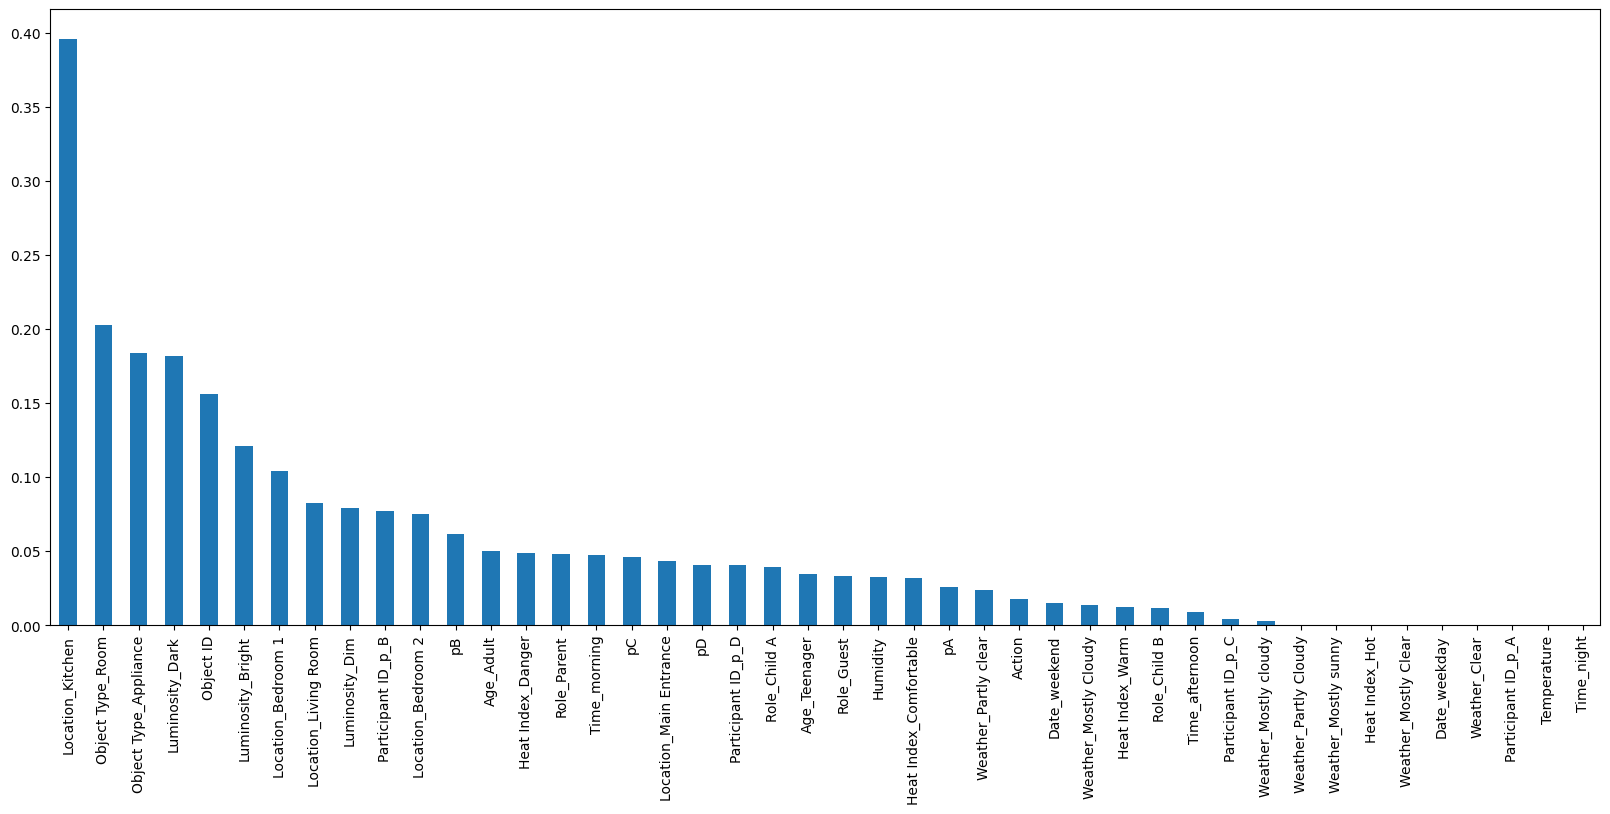

In [13]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [14]:
from sklearn.feature_selection import SelectKBest
#No we Will select the top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Location_Bedroom 2', 'Location_Kitchen', 'Object Type_Appliance',
       'Object Type_Room', 'Luminosity_Dark'],
      dtype='object')

In [37]:
X_train.drop(['Age_Teenager','Date_weekend','Location_Bedroom 1','Luminosity_Dark',
 'Object Type_Room','Role_Child A','Role_Child B','Role_Guest','Role_Parent'],axis=1, inplace=True)
X_test.drop(['Age_Teenager','Date_weekend','Location_Bedroom 1','Luminosity_Dark',
 'Object Type_Room','Role_Child A','Role_Child B','Role_Guest','Role_Parent'],axis=1, inplace=True)
f_p_values=chi2(X_train,y_train)
f_p_values

p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values.sort_values(ascending=False)

Weather_Mostly Cloudy      9.4295e-01
Action                     8.9024e-01
Temperature                8.6322e-01
Humidity                   8.1026e-01
Weather_Partly Cloudy      7.3454e-01
Weather_Mostly Clear       7.3454e-01
Time_night                 6.1440e-01
Weather_Mostly sunny       5.6330e-01
Time_afternoon             5.5305e-01
Date_weekday               5.0151e-01
Heat Index_Comfortable     4.9539e-01
Heat Index_Warm            4.4495e-01
Weather_Clear              4.2856e-01
Weather_Mostly cloudy      3.6261e-01
Time_morning               3.3984e-01
Participant ID_p_A         3.0246e-01
Heat Index_Hot             1.5541e-01
Participant ID_p_C         8.6789e-02
Weather_Partly clear       3.2595e-02
pA                         1.8239e-02
Heat Index_Danger          1.4646e-02
pD                         4.1420e-03
pC                         2.3233e-03
Age_Adult                  2.3112e-04
Luminosity_Dim             1.4735e-04
Location_Main Entrance     2.1047e-05
Location_Liv

<Axes: >

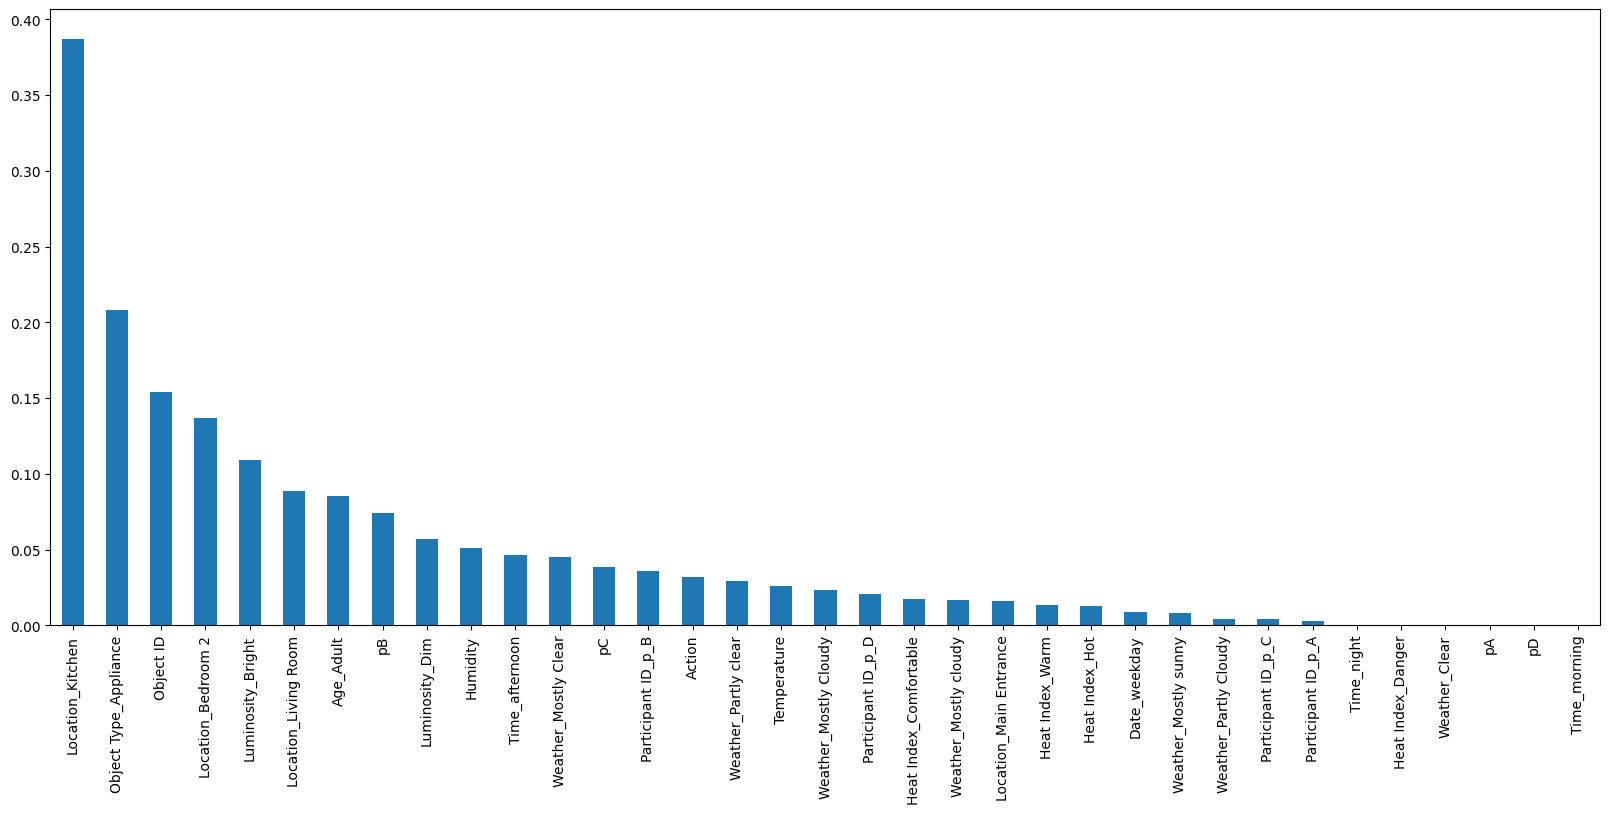

In [38]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [39]:
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Object ID', 'pC', 'Participant ID_p_D', 'Location_Kitchen',
       'Object Type_Appliance'],
      dtype='object')